In [1]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [2]:
import nltk
import pandas as pd
from pandas import DataFrame, Series
import PyPDF2
from PyPDF2 import PdfFileReader
import math
import requests
import regex as re
import datetime
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import nltk
from nltk import corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from datetime import datetime

In [3]:
meeting = DataFrame(pd.read_csv("Board Committee Commission Meeting Data.csv"))
agendas = meeting['Agenda_Link']
notes = meeting['Minutes_Link']

In [4]:
for i in range(len(meeting)):
    new = re.sub(r"\s", "", meeting['Meeting_ID'][i])
    meeting['Meeting_ID'][i] = new

<ipython-input-4-77a6d85d7f34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meeting['Meeting_ID'][i] = new


download **agenda** pdfs with the request module

In [5]:
# for i, url in enumerate(agendas):
#     try:
#         r = requests.get(url)
#         r.raise_for_status()
#     except Exception:
#         continue
#     text = "pdf_agendas/{}.pdf"
#     with open(text.format(meeting.iloc[i,0]),'wb') as f:
#         f.write(r.content)

download **notes** pdfs with the request module

In [6]:
# for i, url in enumerate(notes):
#     try:
#         r = requests.get(url)
#         r.raise_for_status()
#     except Exception:
#         continue
#     text = "pdf_notes/{}.pdf"
#     with open(text.format(meeting.iloc[i,0]),'wb') as f:
#         f.write(r.content)

In [7]:
meeting['Duration_minutes'] = meeting['Duration'] #copy a column so that I have one to replace with the cell below

In [8]:
for i in range(len(meeting['Duration'])):
    time = re.split(':',meeting['Duration'][i])
    time = [int(x) for x in time]
    seconds = time[0]*60 + time[1] + time[0]/60
    meeting.iloc[i,10] = seconds

In [9]:
meeting

,Meeting_ID,Topic,Scheduled_Start_Time,Zoom_Meeting_Start_Time,Zoom_Meeting_End_Time,Duration,Participants,Recording,Agenda_Link,Minutes_Link,Duration_minutes
0,954410442,CCEC,4:30:00 PM,3/31/2020 15:40,6:27 PM,2:47:55,52,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,167.033
1,531697510,Common Council,6:30:00 PM,3/31/2020 17:04,02:53 AM(Next day),9:48:36,337,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,588.15
2,411578576,"Finance Committee: Meeting of April 6, 2020",4:30:00 PM,4/6/2020 15:40,5:49 PM,2:09:00,31,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,129.033
3,563608269,"CCEC: Meeting of April 9, 2020",6:00:00 PM,4/9/2020 16:57,7:53 PM,2:56:08,36,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,176.033
4,468948855,"Plan Commission: Meeting of April 13, 2020",5:30:00 PM,4/13/2020 16:35,9:14 PM,4:38:54,80,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,278.067
...,...,...,...,...,...,...,...,...,...,...,...
150,93491014777,Public Safety Review Committee Budget Subcommi...,NaN,7/29/2020 17:46,8:17 PM,2:30:50,21,Yes,NaN,NaN,150.033
151,98563848547,"Plan Commission: Meeting of July 30, 2020",5:00:00 PM,7/30/2020 15:58,8:06 PM,4:08:29,54,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,248.067
152,99885787121,Body-Worn Camera Feasibility Review Committee:...,5:30:00 PM,7/30/2020 17:06,7:35 PM,2:28:11,23,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,148.033
153,94972195424,Task Force on Municipal Golf in Madison Parks:...,6:00:00 PM,7/30/2020 17:35,8:24 PM,2:49:27,81,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,169.033


Coef: [0.33873689]
Intercept: -10.849966498419846
Number of Participants ~= 0.3387368917661893*Duration_minutes + -10.849966498419846


Text(0.5, 1.0, 'Participants by Meeting Duration')

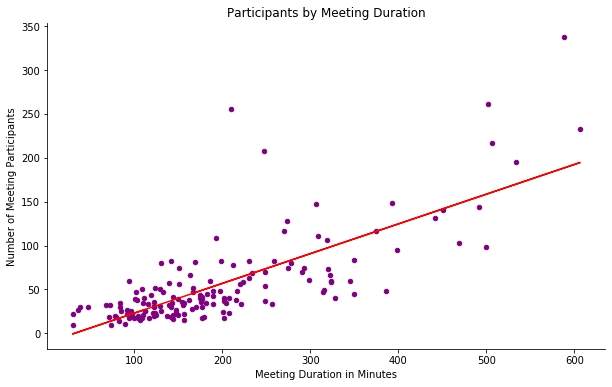

In [10]:
fig, ax = plt.subplots(figsize = (10,6))
meeting.plot.scatter(x='Duration_minutes', y = 'Participants', ax=ax, color='purple')

X=meeting['Duration_minutes'].values.reshape(-1, 1)
y=meeting['Participants'].values

r = LinearRegression()
r.fit(X, y)
plt.plot(X, r.predict(X),color='r')

print("Coef:", r.coef_)
print("Intercept:", r.intercept_)

def formula(reg, columns):
    rv = ""
    for i in range(len(columns)):
        rv += "{}*{} + ".format(reg.coef_[0], columns[i])
    rv += str(r.intercept_)
    return rv

print("Number of Participants ~= " + formula(r, ['Duration_minutes']))

ax.set_xlabel("Meeting Duration in Minutes")
ax.set_ylabel("Number of Meeting Participants")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Participants by Meeting Duration')

In [105]:
def get_xterms(x):
    t = pd.DataFrame({"x":x})
    t['logx'] = np.log(t['x'])
    t['log2x'] = np.log2(t['x'])
    return t

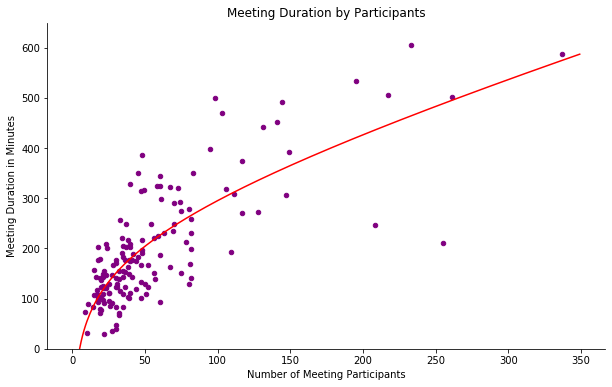

In [106]:
fig, ax = plt.subplots(figsize = (10,6))
meeting.plot.scatter(y='Duration_minutes', x = 'Participants', ax=ax, color='purple')
ax.set_ylabel("Meeting Duration in Minutes")
ax.set_xlabel("Number of Meeting Participants")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Meeting Duration by Participants')
ax.set_ylim(0,650)

lr = LinearRegression()
poly_df=get_xterms(meeting['Participants'])
lr.fit(poly_df, meeting[['Duration_minutes']])
x = np.arange(0.1,350,1)
ax.plot(x, lr.predict(get_xterms(x)),'r')
plt.savefig('meeting_participants.png')


Next Steps: Can we predict Meeting Duration by estimating number of participants or vice versa? 

**Extracting Text from PDF and Tokenizing**

Extracting text from PDFs and adding column for each **agenda**

In [13]:
# with open(path, 'rb') as f:
#         pdf = PdfFileReader(f, strict='False')
#         info = pdf.getDocumentInfo()
#         number_of_pages = pdf.getNumPages()

text_dict = {}
text_list = []
for x in meeting['Meeting_ID']:
    try:
        pdfFileObject = open('pdf_agendas/'+x+'.pdf','rb')
        pdfReader = PdfFileReader(pdfFileObject)
        pageObject = pdfReader.getPage(0)
        number_of_pages = pdfReader.getNumPages()
        txt = ''
    except Exception:
        text_list.append("N/A")
        continue
    for i in range(number_of_pages):
        pageObject = pdfReader.getPage(i)
        txt+= pageObject.extractText()
    text_dict[x] = txt
    text_list.append(txt)
meeting['text']=text_list




In [14]:
text_dict = {}
text_list = []
for x in meeting['Meeting_ID']:
    try:
        pdfFileObject = open('pdf_notes/'+x+'.pdf','rb')
        pdfReader = PdfFileReader(pdfFileObject)
        pageObject = pdfReader.getPage(0)
        number_of_pages = pdfReader.getNumPages()
        txt = ''
    except Exception:
        text_list.append("N/A")
        continue
    for i in range(number_of_pages):
        pageObject = pdfReader.getPage(i)
        txt+= pageObject.extractText()
    text_dict[x] = txt
    text_list.append(txt)
meeting['note_text']=text_list


Below code won't work until you do the one right below this one

In [15]:
meeting['agenda_key']=meeting['text']
meeting['note_key']=meeting['text']
# meeting.so

In [16]:
from gensim.summarization import keywords
import warnings

tokenized_agenda = []
for i in range(len(meeting['Meeting_ID'])):
    text=meeting.iloc[i,-4]
    warnings.filterwarnings("ignore")

    values = keywords(text=text,split='\n',scores=True)

    data = pd.DataFrame(values,columns=['keyword','score'])
    data = data.sort_values('score',ascending=False)
    tokenized_agenda.append(list(data['keyword']))
meeting['agenda_key'] = tokenized_agenda

In [17]:
tokenized_note = []
for i in range(len(meeting['Meeting_ID'])):
    text=meeting.iloc[i,-3]
    warnings.filterwarnings("ignore")

    values = keywords(text=text,split='\n',scores=True)

    data = pd.DataFrame(values,columns=['keyword','score'])
    data = data.sort_values('score',ascending=False)
    tokenized_note.append(list(data['keyword']))
meeting['note_key'] = tokenized_note

In [18]:
meeting

,Meeting_ID,Topic,Scheduled_Start_Time,Zoom_Meeting_Start_Time,Zoom_Meeting_End_Time,Duration,Participants,Recording,Agenda_Link,Minutes_Link,Duration_minutes,text,note_text,agenda_key,note_key
0,954410442,CCEC,4:30:00 PM,3/31/2020 15:40,6:27 PM,2:47:55,52,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,167.033,COMMON COUNCIL EXECUTIVE COMMITTEECity of Madi...,"City of MadisonMadison, WI 53703www.cityofmad...","[committee, council, madison, public, city, co...","[ald, city, council, committee, kemble, bidar,..."
1,531697510,Common Council,6:30:00 PM,3/31/2020 17:04,02:53 AM(Next day),9:48:36,337,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,588.15,COMMON COUNCILCity of MadisonAgenda - AmendedC...,"City of MadisonMadison, WI 53703www.cityofmad...","[sponsors, plans, planning, plan, planned, pub...","[sponsors, streets, street, res, city, approve..."
2,411578576,"Finance Committee: Meeting of April 6, 2020",4:30:00 PM,4/6/2020 15:40,5:49 PM,2:09:00,31,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,129.033,FINANCE COMMITTEECity of MadisonAgenda - Appro...,"City of MadisonMadison, WI 53703www.cityofmad...","[finance, meeting, covid, city, program, trans...","[motion, bidar, moreland, meter, mckinney, com..."
3,563608269,"CCEC: Meeting of April 9, 2020",6:00:00 PM,4/9/2020 16:57,7:53 PM,2:56:08,36,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,176.033,COMMON COUNCIL EXECUTIVE COMMITTEECity of Madi...,"City of MadisonMadison, WI 53703www.cityofmad...","[comments, comment, city, meeting, meetings, c...","[ald, information, informative, staff, eoc, co..."
4,468948855,"Plan Commission: Meeting of April 13, 2020",5:30:00 PM,4/13/2020 16:35,9:14 PM,4:38:54,80,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,278.067,PLAN COMMISSIONCity of MadisonAgenda - Approve...,"City of MadisonMadison, WI 53703www.cityofmad...","[building, buildings, plan, planning, plans, p...","[police, update, chief, public, minutes, motio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,93491014777,Public Safety Review Committee Budget Subcommi...,NaN,7/29/2020 17:46,8:17 PM,2:30:50,21,Yes,NaN,NaN,150.033,N/A,N/A,[],[]
151,98563848547,"Plan Commission: Meeting of July 30, 2020",5:00:00 PM,7/30/2020 15:58,8:06 PM,4:08:29,54,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,248.067,PLAN COMMISSIONCity of MadisonAgenda - Approve...,"City of MadisonMadison, WI 53703www.cityofmad...","[meeting, plan, planning, city, comments, comm...","[meeting, meetings, plan, planning, zellers, m..."
152,99885787121,Body-Worn Camera Feasibility Review Committee:...,5:30:00 PM,7/30/2020 17:06,7:35 PM,2:28:11,23,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,148.033,BODY-WORN CAMERA FEASIBILITY REVIEW COMMITTEEC...,"City of MadisonMadison, WI 53703www.cityofmad...","[meeting, meetings, discussion, pdf, committee...","[committee, costs, cost, body, video, vendor, ..."
153,94972195424,Task Force on Municipal Golf in Madison Parks:...,6:00:00 PM,7/30/2020 17:35,8:24 PM,2:49:27,81,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,169.033,TASK FORCE ON MUNICIPAL GOLF IN MADISON PARKSC...,"City of MadisonMadison, WI 53703www.cityofmad...","[meeting, madison, comments, comment, public, ...","[golf, city, kopp, minutes, motion, henak, for..."


**DONT DO THIS UNTIL AFTER YOU ADDED NOTES AND AGENDA TEXT ABOVE BECAUSE OF INDEXING ILOC IS HARDCODED**

In [20]:
dates = []
for i in meeting['Zoom_Meeting_Start_Time']:
    unformatted = i.split()[0]
    datetime = datetime.strptime(unformatted , '%m/%d/%Y')
    dates.append(datetime)
    
day_of_week = [x.strftime("%A") for x in dates]
meeting['day_of_week']=day_of_week

Possibility: Off-days such as Friday, Saturday, and Sunday 

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

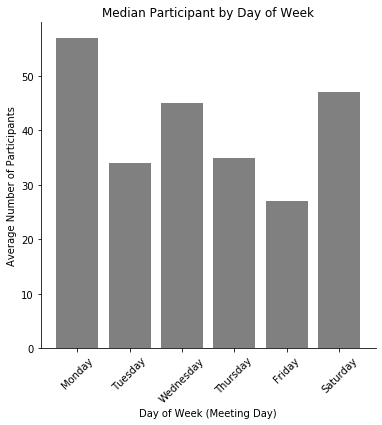

In [41]:
fig, ax = plt.subplots(figsize=(6,6))
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_of_week_data = meeting.groupby('day_of_week',sort=False).median().reindex(cats) 
day_of_week_data= day_of_week_data.reset_index()
plt.bar(x= day_of_week_data['day_of_week'], height=day_of_week_data['Participants'], color = 'grey')
ax.set_xlabel("Day of Week (Meeting Day)")
ax.set_ylabel("Average Number of Participants")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Median Participant by Day of Week')
plt.xticks(rotation=45) 
# plt.savefig('meetin_by_day.png')

# PDFminer Method 

Gathering Number of Agenda Items

In [42]:
import re
import pdfminer
from subprocess import check_output
from bs4 import BeautifulSoup
from collections import defaultdict

In [83]:
def find_near(x, y):
    for x_ in range(x-5, x+5):
        for y_ in range(y-5, y+5):
            if (x_, y_) in text:
                return text[(x_, y_)]
    return None

meeting_id = meeting['Meeting_ID']
agenda_items = []
for i in meeting_id:
    agenda_file = "pdf_agendas/" + i +".pdf"
    try:
        s = check_output(["pdf2txt.py", "-t", "html", "-Y", "loose", agenda_file])
    except Exception:
        agenda_items.append("N/A")
        continue
    page = BeautifulSoup(s)

    text = {} # key=(x,y), val=text

    for div in page.find_all("div"): #gets a list of different div tags 
        style = div.attrs.get("style", "") #attrs will tell you the positioning
        m1 = re.search("left:(\d+)px", style)
        m2 = re.search("top:(\d+)px", style)
        if m1 and m2:
            x, y = int(m1.group(1)), int(m2.group(1))#each parenthesis is a different group
            text[(x,y)] = div.get_text()

    agenda_dict = {}

    for (x,y), t in text.items():
        # agenda items are roughly at x=170
        if 165 < x < 175:
            # agenda numbers are rougly at x=69, same y as text
            num = find_near(69, y)
            if num and re.match('[0-9]+',num) != None:
                agenda_num = int(re.match('[0-9]+',num).group(0))
                agenda_dict[agenda_num] = t

    agenda_items.append(agenda_dict)

    

In [84]:
meeting['agenda_num'] = agenda_items
agenda_amount = [len(x) for x in meeting['agenda_num']]
meeting['agenda_amount'] = agenda_amount

In [85]:
meeting

,Meeting_ID,Topic,Scheduled_Start_Time,Zoom_Meeting_Start_Time,Zoom_Meeting_End_Time,Duration,Participants,Recording,Agenda_Link,Minutes_Link,Duration_minutes,text,note_text,agenda_key,note_key,day_of_week,agenda_num,agenda_amount
0,954410442,CCEC,4:30:00 PM,3/31/2020 15:40,6:27 PM,2:47:55,52,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,167.033,COMMON COUNCIL EXECUTIVE COMMITTEECity of Madi...,"City of MadisonMadison, WI 53703www.cityofmad...","[committee, council, madison, public, city, co...","[ald, city, council, committee, kemble, bidar,...",Tuesday,{5: 'Establishing a Body-Worn Camera Feasibili...,7
1,531697510,Common Council,6:30:00 PM,3/31/2020 17:04,02:53 AM(Next day),9:48:36,337,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,588.15,COMMON COUNCILCity of MadisonAgenda - AmendedC...,"City of MadisonMadison, WI 53703www.cityofmad...","[sponsors, plans, planning, plan, planned, pub...","[sponsors, streets, street, res, city, approve...",Tuesday,{1: 'Commerating the 50th anniversary of Earth...,116
2,411578576,"Finance Committee: Meeting of April 6, 2020",4:30:00 PM,4/6/2020 15:40,5:49 PM,2:09:00,31,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,129.033,FINANCE COMMITTEECity of MadisonAgenda - Appro...,"City of MadisonMadison, WI 53703www.cityofmad...","[finance, meeting, covid, city, program, trans...","[motion, bidar, moreland, meter, mckinney, com...",Monday,{1: 'A Resolution to authorize the noncompetit...,6
3,563608269,"CCEC: Meeting of April 9, 2020",6:00:00 PM,4/9/2020 16:57,7:53 PM,2:56:08,36,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,176.033,COMMON COUNCIL EXECUTIVE COMMITTEECity of Madi...,"City of MadisonMadison, WI 53703www.cityofmad...","[comments, comment, city, meeting, meetings, c...","[ald, information, informative, staff, eoc, co...",Thursday,{4: 'Discuss Council's Role & Response during ...,2
4,468948855,"Plan Commission: Meeting of April 13, 2020",5:30:00 PM,4/13/2020 16:35,9:14 PM,4:38:54,80,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,278.067,PLAN COMMISSIONCity of MadisonAgenda - Approve...,"City of MadisonMadison, WI 53703www.cityofmad...","[building, buildings, plan, planning, plans, p...","[police, update, chief, public, minutes, motio...",Monday,{1: 'General Public Correspondence to the Plan...,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,93491014777,Public Safety Review Committee Budget Subcommi...,NaN,7/29/2020 17:46,8:17 PM,2:30:50,21,Yes,NaN,NaN,150.033,N/A,N/A,[],[],Wednesday,N/A,3
151,98563848547,"Plan Commission: Meeting of July 30, 2020",5:00:00 PM,7/30/2020 15:58,8:06 PM,4:08:29,54,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,248.067,PLAN COMMISSIONCity of MadisonAgenda - Approve...,"City of MadisonMadison, WI 53703www.cityofmad...","[meeting, plan, planning, city, comments, comm...","[meeting, meetings, plan, planning, zellers, m...",Thursday,"{1: 'Plan Commission Public Comment Period ', ...",2
152,99885787121,Body-Worn Camera Feasibility Review Committee:...,5:30:00 PM,7/30/2020 17:06,7:35 PM,2:28:11,23,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,148.033,BODY-WORN CAMERA FEASIBILITY REVIEW COMMITTEEC...,"City of MadisonMadison, WI 53703www.cityofmad...","[meeting, meetings, discussion, pdf, committee...","[committee, costs, cost, body, video, vendor, ...",Thursday,{1: 'PUBLIC COMMENT FOR THE 7/30/2020 MEETING ...,5
153,94972195424,Task Force on Municipal Golf in Madison Parks:...,6:00:00 PM,7/30/2020 17:35,8:24 PM,2:49:27,81,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,169.033,TASK FOR

(0, 650)

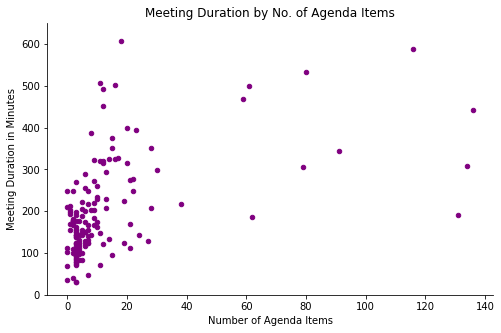

In [102]:
fig, ax = plt.subplots(figsize =(8,5))
meeting.plot.scatter(x='agenda_amount',y='Duration_minutes', ax=ax, color='purple')
ax.set_ylabel("Meeting Duration in Minutes")
ax.set_xlabel("Number of Agenda Items")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Meeting Duration by No. of Agenda Items')
ax.set_ylim(0,650)

(0, 650)

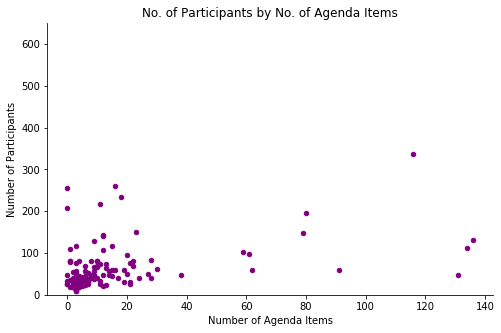

In [101]:
fig, ax = plt.subplots(figsize =(8,5))
meeting.plot.scatter(x='agenda_amount',y='Participants', ax=ax, color='purple')
ax.set_ylabel("Number of Participants")
ax.set_xlabel("Number of Agenda Items")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('No. of Participants by No. of Agenda Items')
ax.set_ylim(0,650)